# CS 555: Homework 4
# Eric Stevens
# November 20, 2018





## VQ and EM  algorithm

This homework we'll be focusing on EM Algorithm on a very simple coin tossing example. The goal of the homework is to estimate the parameters of the model given training examples. The homework is based on the following paper and you are highly encouraged to read through the paper to fully understand the problem:

* Do, Chuong B., and Serafim Batzoglou. "What is the expectation maximization algorithm?." Nature biotechnology 26.8 (2008): 897-899.

The observed features are sequences of twenty heads (H) and tails (T) coming from three unfair coins as follow stored at `seq_H_T.txt`. We generate these samples with three different coins. We also offer you the code for sample generation.

     
### Part 1 - Vector quantization
Given the sample sequences of three coins, estimate the biases (centers) using VQ (k-means) algorithm. For implementing k-means, you can randomly initialize three centers from the range of 0 to 1. This mean we will group samples based on their frequency of heads. For example, let's say we have two centers, 0.2 and 0.9, and a sample, frequency of heads is 0.7. Then, this sample would be consider belongs to the second group. 

Also since we already know that there are only three coins, we fix the total number of centers to 3.


#### What to turn in:

1. Submit your estimated biases at the end of 25th itration of both VQ and EM along with your codes. 
    2. Check how quickly parameters of the model (biases in this example) converge by drawing  parametrs in a plot where the X axis is the number of iteration and Y axis is the estimated biased values. It should looks like this ![](VQ.png)



## My Solution:

In [ ]:
# setup environment
import random as rdm
import time
import matplotlib.pyplot as plt

## IF HAVING PROBLEMS WITH PLOTS REMOVE LINES BELOW
# HIGHER DEFINITION PLOTS:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


### Convert File to List:

In [ ]:

# turn text file into 2D float array
with open("seq_H_T.txt") as textFile:
    lines = [[float(i) for i in line.split()] for line in textFile]


### Convergence Itterator and Plotter

This function will be used in both forms of clustering. This function takes the the H/T data as a 2D list. The second function is the **learning function**, which is the function that defines the a single update for either the k-means or EM clustering algo. The replicate perameter is set to true only to reproduce the plots provided the assignment.

In [ ]:

def converge_plotter(lines, learning_function, replicate = False):

    # initial centers: random / replicate 
    if replicate:
        ct = [0.4, 0.6, 0.9] 
    else:
        rdm.seed(time.time())
        ct = [rdm.random() for _ in range(3)]

    # hold succession of centers
    center_iterations = [ct]

    # do 25 iterations
    for i in range(25):
        ct = learning_function(lines, ct) 
        center_iterations.append(ct)

    # transpose results for plotting
    m = center_iterations
    to_plot = [[m[j][i] for j in range(len(m))] for i in range(len(m[0]))] 

    # plot the iterations
    x_axis = [i for i in range(26)]
    plt.plot(x_axis, to_plot[0], 'blue')
    plt.plot(x_axis, to_plot[1], 'orange')
    plt.plot(x_axis, to_plot[2], 'green')
    plt.show()
    print("Thetas: ")
    print(center_iterations[len(center_iterations)-1])


### K-means Update

This function takes in the series of trials as a 2D list and it takes the current centroids. It calculates and returns updated centroids using the K-means algorithm.

In [ ]:

'''
k_means_update:
IN: 
    trials - a 2d list of H/T data
    centers - a list of centroids
OUT:
    updated_centers - revised centroids
'''
def k_mean_update(trials, centers):
    
    means = [sum(line)/float(len(line)) for line in trials] 
    
    # empty two-d array to be filled with values closest to each center
    segments = [[] for center in centers]
    
    # seperate values into segments closest to centroid
    for value in means:
        distance = [(value-center)**2 for center in centers]
        add_to_index = distance.index(min(distance))
        segments[add_to_index].append(value)
    
    # calulate mean of segments and make them new centers
    updated_centers = [sum(seg)/float(len(seg)) for seg in segments]
    
    # return updated centers in form of input centers
    return updated_centers




### Reproduce Assignment Plot

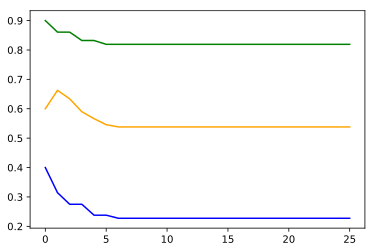

Thetas: 
[0.2274193548387097, 0.5381578947368421, 0.8191964285714286]


In [368]:
converge_plotter(lines, k_mean_update, replicate=True)

### A Few Random Initial Centroid Plots

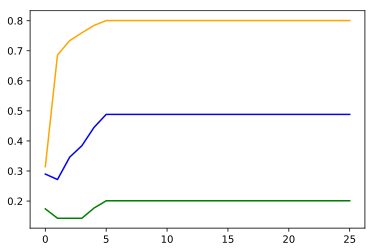

Thetas: 
[0.48835616438356183, 0.8003968253968257, 0.20098039215686284]


In [369]:
converge_plotter(lines, k_mean_update)

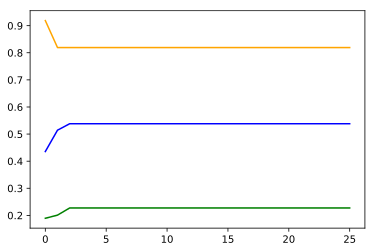

Thetas: 
[0.5381578947368421, 0.8191964285714286, 0.2274193548387097]


In [370]:
converge_plotter(lines, k_mean_update)

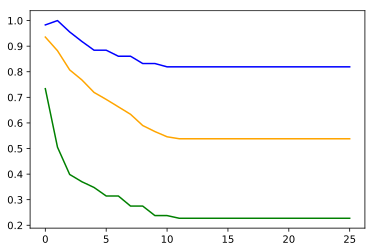

Thetas: 
[0.8191964285714286, 0.5381578947368421, 0.2274193548387097]


In [382]:
converge_plotter(lines, k_mean_update)

<font color=red> self-assessment: </font>

### Part 2 - EM
Estimate the biases via EM given the sample sequences. Please check [this slide](https://repo.cslu.ohsu.edu/asgari/seqf18/blob/master/Lectures/lect1_week7.pdf) for how to implement it.


#### For Part 2 only:
* Submit your estimated biases at the end of 25th itration of both VQ and EM along with your codes. 
2. Check how quickly parameters of the model (biases in this example) converge by drawing  parametrs in a plot where the X axis is the number of iteration and Y axis is the estimated biased values. It should looks like this ![](em_theta.png)
3. Monitor the learning progress by drawing the log-likelihood score in a plot where the horizontal axis is the number of iteration. 
$$\textbf{X}=\{X_1,\cdots,X_N\} ~~;~~ \Theta=\{\theta_1,\theta_2,\theta_3\}$$ 
$$L(\Theta|\textbf{X})=\sum_{i=1}^N{\log\sum_{k=1}^3{\pi_k p(X_i|\theta_k)}}$$

4. Try out a few different initial probabilities and discuss its effect on the estimated parameters. 
5. Try out the estimated parameters obtained by VQ as initiale points to EM and discuss its benefits

## Reminder


For the HW, you are allowed to use python libraries such as numpy. However, you should write your own code from the scratch; i.e., you are not allowed to use built-in functions for VQ and EM  algorithms such as those that are available at scikit-learn.

## My Solution

### Expectation Maximization Update

This function takes in the series of trials as a 2D list and it takes the current centroids. It calculates and returns updated centroids using the EM algorithm.

In [372]:
'''
expectation_maximization:
IN: 
    trials - a 2d list of H/T data
    centers - a list of centroids
OUT:
    theta_updates - revised centroids
'''
def expectation_maximization(trials, centers):
    
    sample_size = len(trials[0])
    heads_probabilities = [sum(line)/float(len(line)) for line in lines]
    
    theta_primes = [[] for center in centers]
    
    # get probabilities of each centroid for each observation
    for h in heads_probabilities:
        temp = []
        for c in centers:
            temp.append((c**(h*sample_size))*((1-c)**(sample_size*(1-h))))
        for i in range(len(temp)):
            theta_primes[i].append(temp[i]/sum(temp))
    
    # calculate centroid updates
    theta_updates = []
    for tp in theta_primes:
        H = sum([tp[i]*heads_probabilities[i]*sample_size for i in range(len(tp))])
        T = sum([tp[i]*(1-heads_probabilities[i])*sample_size for i in range(len(tp))])
        theta_updates.append(H/(H+T))

    return theta_updates


### Reproduce Assignment Plot

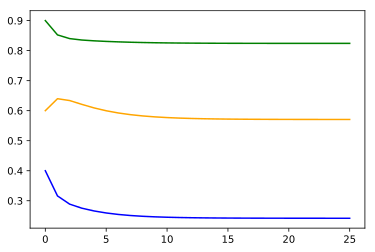

Thetas: 
[0.24173297669281463, 0.5706873683476854, 0.8240759628942623]


In [373]:
converge_plotter(lines,expectation_maximization, replicate=True)

### A Few Random Initial Centroid Plots

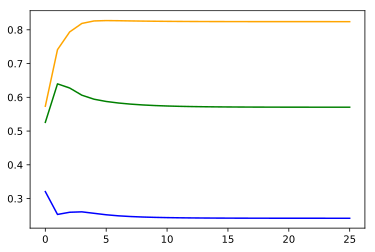

Thetas: 
[0.24172017761850725, 0.824069732882782, 0.5706627166077982]


In [374]:
converge_plotter(lines,expectation_maximization)

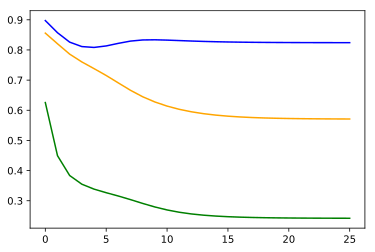

Thetas: 
[0.8241689507223264, 0.5710557418338121, 0.24192464568044464]


In [375]:
converge_plotter(lines,expectation_maximization)

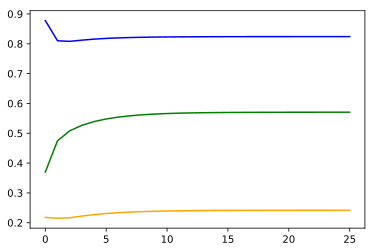

Thetas: 
[0.8240518342285602, 0.2416834354695324, 0.5705919125127079]


In [376]:
converge_plotter(lines,expectation_maximization)

### Likelihood Functions

Below are helper functions that aid in the calculation and plotting of the max likelihood scores.

In [377]:
from math import log

# this function is the same as the one above except it
# returns the pi values of all runs as well
def expectation_maximization_return_pis(trials, centers):
    
    sample_size = len(trials[0])
    heads_probabilities = [sum(line)/float(len(line)) for line in lines]
    
    theta_primes = [[] for center in centers]
    
    # get probabilities of each centroid for each observation
    for h in heads_probabilities:
        temp = []
        for c in centers:
            temp.append((c**(h*sample_size))*((1-c)**(sample_size*(1-h))))
        for i in range(len(temp)):
            theta_primes[i].append(temp[i]/sum(temp))
    
    # calculate centroid updates
    theta_updates = []
    for tp in theta_primes:
        H = sum([tp[i]*heads_probabilities[i]*sample_size for i in range(len(tp))])
        T = sum([tp[i]*(1-heads_probabilities[i])*sample_size for i in range(len(tp))])
        theta_updates.append(H/(H+T))

    return [theta_updates, theta_primes]


# does the likelihood calculation for a single instance of thetas and there
# corrisponding primes.
def get_likelihood(thetas,primes, hp, ss):
    lk = 0.0
    for i in range(len(hp)):

        sum_theta = 0
        for t in range(len(thetas)):
            #print(primes[t][i])
            sum_theta += (primes[t][i])*((thetas[t]**(hp[i]*ss))*((1-thetas[t])**((1-hp[i])*ss)))
        #print(log(sum_theta))
        lk += log(sum_theta,2)
    return lk

# runs iterations of 'get_likelihood' and plots relsuts
def max_likelihood_plotter(hp, ss, init_thetas):
    print("INITIAL THETAS:",init_thetas)
    likelihood = []
    theta_prime = [[1.0/3.0 for i in range(len(hp))] for j in range(3)]
    likelihood.append(get_likelihood(init_thetas, theta_prime,hp,ss))
    next_thetas = init_thetas
    for i in range(25):
        [next_thetas, theta_prime] = expectation_maximization_return_pis(lines, next_thetas)
        likelihood.append(get_likelihood(next_thetas, theta_prime,hp,ss))

    x_range = [i for i in range(26)]
    plt.plot(x_range, likelihood, 'blue')
    plt.show()
    print("TERMINATION THETAS:",next_thetas)


### Likelihood

Below are a few pairs of graphs. These graphs were aquired by randomly initializing thetas. The first graph uses EM the whole way. The second graph performs vector quantization for 25 iterations before feeding into EM.

('INITIAL THETAS:', [0.9270460649165618, 0.62152842340852, 0.7969674686500083])


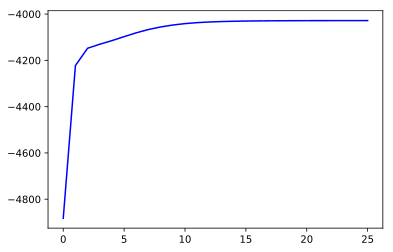

('TERMINATION THETAS:', [0.8241305577590923, 0.24184536441872515, 0.5709035495006956])
('INITIAL THETAS:', [0.8191964285714286, 0.2274193548387097, 0.5381578947368421])


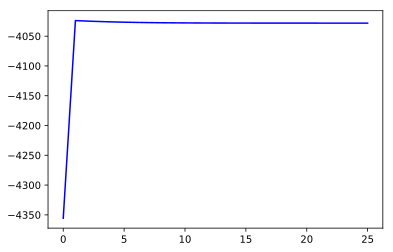

('TERMINATION THETAS:', [0.8240590055983024, 0.24169815157405433, 0.5706202777579683])


In [340]:
init_thetas = [rdm.random() for i in range(3)]   
sample_size = len(lines[0])
heads_pobabilities = [sum(line)/float(len(line)) for line in lines]

max_likelihood_plotter(heads_pobabilities, sample_size,init_thetas)

for x in range(25):
    init_thetas = k_mean_update(lines, init_thetas)
    
max_likelihood_plotter(heads_pobabilities, sample_size,init_thetas)

('INITIAL THETAS:', [0.37083853603513206, 0.21315704522046752, 0.724998351672528])


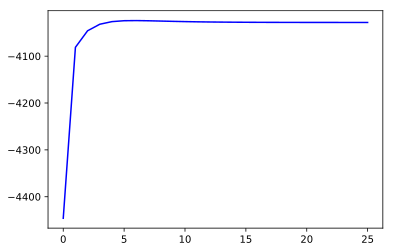

('TERMINATION THETAS:', [0.5705681429476905, 0.24167110711566975, 0.8240458238417002])
('INITIAL THETAS:', [0.48835616438356183, 0.20098039215686284, 0.8003968253968257])


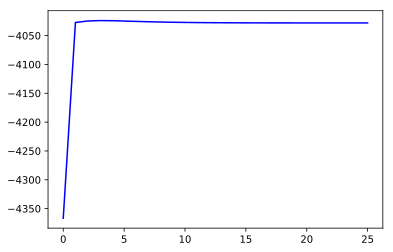

('TERMINATION THETAS:', [0.5706026173321928, 0.241688988680335, 0.8240545407855201])


In [345]:
init_thetas = [rdm.random() for i in range(3)]   
sample_size = len(lines[0])
heads_pobabilities = [sum(line)/float(len(line)) for line in lines]

max_likelihood_plotter(heads_pobabilities, sample_size,init_thetas)

for x in range(25):
    init_thetas = k_mean_update(lines, init_thetas)
    
max_likelihood_plotter(heads_pobabilities, sample_size,init_thetas)

('INITIAL THETAS:', [0.7482964276318603, 0.22752332572431355, 0.21976586317022373])


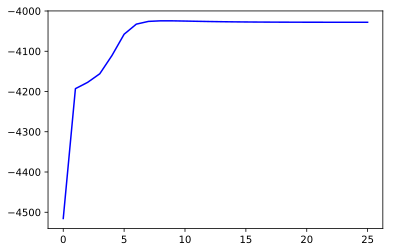

('TERMINATION THETAS:', [0.8240301141935088, 0.5705060306678733, 0.24163890681653954])
('INITIAL THETAS:', [0.8003968253968257, 0.48835616438356183, 0.20098039215686284])


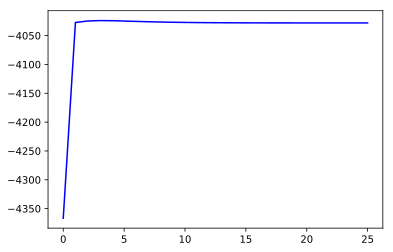

('TERMINATION THETAS:', [0.82405454078552, 0.5706026173321922, 0.24168898868033475])


In [367]:
init_thetas = [rdm.random() for i in range(3)]   
sample_size = len(lines[0])
heads_pobabilities = [sum(line)/float(len(line)) for line in lines]

max_likelihood_plotter(heads_pobabilities, sample_size,init_thetas)

for x in range(25):
    init_thetas = k_mean_update(lines, init_thetas)
    
max_likelihood_plotter(heads_pobabilities, sample_size,init_thetas)

### Observation

As we can see, in all above instance of the graph pairs. The lower ones, whos initial thetas were fed through vector quantiaztions before enterm EM, all converge much more rapidly than the upper ones, whos values were not fed through vector quantiaztion. 

<font color=red> self-assessment: </font>